<a href="https://colab.research.google.com/github/jhildebrand22/HW-PS353/blob/main/12_14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install whit_phys_util

     |████████████████████████████████| 10.9 MB 14.1 MB/s 


In [3]:
from scipy.integrate import solve_ivp
import numpy as np
import matplotlib.pyplot as plt
import whit_phys_util as buc

Mounted at /content/drive


In [4]:
repo = buc.local_repository('https://github.com/jhildebrand22/HW-PS353')

Cloning repository from GitHub.


$$
\ddot\phi + 2\beta\dot\phi +\omega_0^2\sin\phi = \gamma\omega_0^2\cos\omega t
$$

In [38]:
#given params 
gam = 1.084
omega = 2*np.pi
omega_0 = 1.5*omega
beta = omega_0/4 

phi0_1 = [0,0]
phi0_2 = [0.00001,0]

In [39]:
def dwdt(t,w):
  phi = w[0]
  phi_dot = w[1]
  phi_ddot = -2*beta*phi_dot - omega_0**2*np.sin(phi) + gam*omega_0**2*np.cos(omega*t)
  return[phi_dot, phi_ddot] 

In [62]:
t = np.linspace(0,7,500)
tspan = [0,7]

In [63]:
sol1 = solve_ivp(dwdt,tspan,phi0_1,t_eval=t,rtol = 1e-12)
sol2 = solve_ivp(dwdt,tspan,phi0_2,t_eval=t,rtol = 1e-12)
#sol3 = solve_ivp(dwdt,tspan,phi0_3,t_eval=t)
dphi = np.log10(abs(sol2.y[0] - sol1.y[0]))

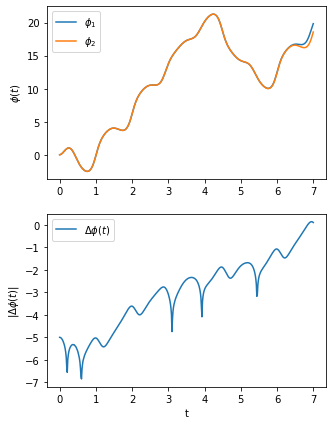

In [67]:
fig,ax = plt.subplots(2, figsize=(5,7))
ax[0].plot(sol1.t,sol1.y[0],label='$\phi_1$')
ax[0].plot(sol2.t,sol2.y[0],label ='$\phi_2$')
ax[0].set_ylabel('$\phi(t)$');
ax[0].legend()
ax[1].plot(sol1.t, dphi,label='$\Delta\phi(t)$')
ax[1].set_ylabel('$|\Delta\phi(t)|$');
ax[1].set_xlabel('t');
ax[1].legend();

The plot does confirm that the motion is chaotic becuase the crests of this graph grow exponentially, showing that $\Delta\phi(t)$ grows exponentially. This signifies the sensitive dependence on initial conditions characteristic f chaotic behavior, because as time increases, $\Delta\phi(t)$ is growing exponentially when the initial $\phi(0)$'s were different by 0.00001.